In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt

import pyshtools as sh
from pyshtools.shclasses import SHCoeffs, SHGrid, SHWindow

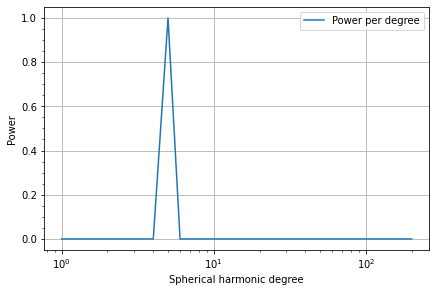

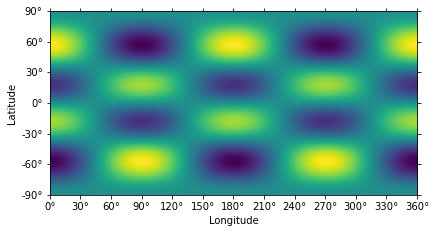

In [3]:
#https://deepnote.com/project/SHTOOLS-D_VUMWy3QrCcK0zjxSTzqw/%2Fexamples%2Fnotebooks%2Ftutorial_3.ipynb/#00005-981fd834-ab43-4bc5-ad3f-979309914f67

lmax=200
coeffs = np.zeros((2, lmax+1, lmax+1))
coeffs[0, 5, 2] = 1.
coeffs_l5m2 = SHCoeffs.from_array(coeffs)
ig, ax = coeffs_l5m2.plot_spectrum(xscale='log', yscale='lin')
plt.show()
grid_l5m2 = coeffs_l5m2.expand('DH2')
fig, ax = grid_l5m2.plot()
plt.show()

In [7]:
grid_l5m2

kind = 'real'
grid = 'DH'
n = 402
sampling = 2
nlat = 403
nlon = 805
lmax = 200
units = None
extend = True


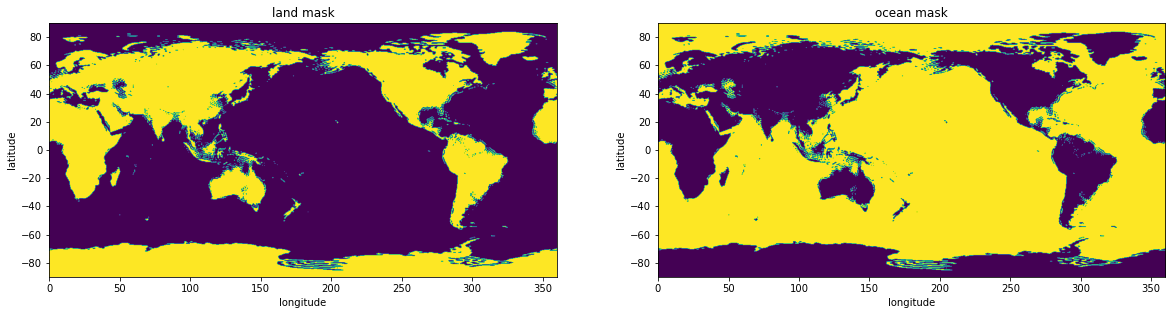

In [5]:
infile = 'srtmp300.msl'
clm = SHCoeffs.from_file(infile)
topo = clm.expand(grid='DH2')
land_mask = (topo.data > 0)
ocean_mask = ~land_mask
fig, (col1, col2) = plt.subplots(1, 2, figsize=(20, 10))
col1.imshow(land_mask, extent=(0, 360, -90, 90), cmap='viridis')
col1.set(xlabel='longitude', ylabel='latitude', title='land mask')
col2.imshow(ocean_mask, extent=(0, 360, -90, 90), cmap='viridis')
col2.set(xlabel='longitude', ylabel='latitude', title='ocean mask');

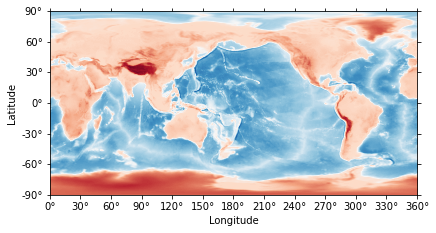

In [8]:
fig, ax = topo.plot(cmap='RdBu',
                    cmap_reverse=True,
                    show=False)

kind = 'real'
grid = 'DH'
n = 50
sampling = 2
nlat = 50
nlon = 100
lmax = 24
units = None
extend = False


(<Figure size 432x388.8 with 2 Axes>,
 <AxesSubplot:xlabel='Spherical harmonic order', ylabel='Spherical harmonic degree'>)

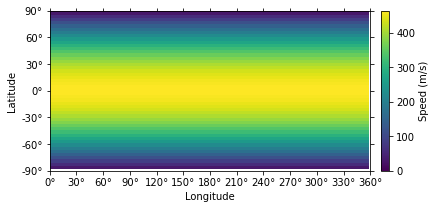

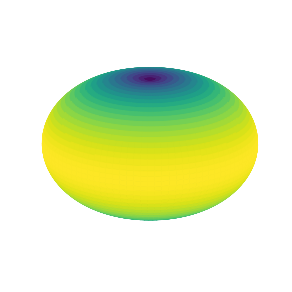

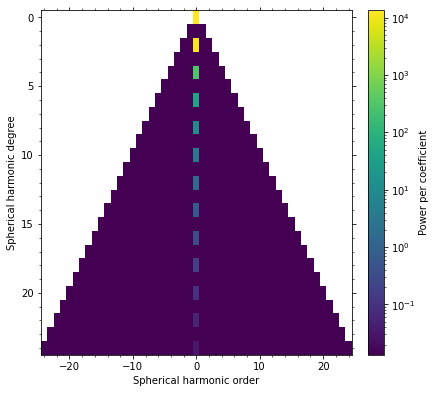

In [117]:

PI = math.pi

A = 6378*1e3
OMEGA = 2*PI/24/3600   #Earth rate of rotation 

grid_lats = 50

lats = np.zeros(grid_lats)
speeds = np.zeros((grid_lats,2*grid_lats))

for i in range(0, grid_lats):
    lat = PI/2 - i * PI/grid_lats
    lats[i] = lat*180/PI
    speeds[i,:] = A*OMEGA*math.cos(lat)

#plt.plot(lats,speeds[:,0])

s = SHGrid.from_array(speeds)
print(s)
fig, ax = s.plot( colorbar='right', cb_label='Speed (m/s)')
fig.show()

fig, ax = s.plot3d()
fig.show()

#--------

cilm = SHCoeffs.from_array(sh.expand.SHExpandDH(speeds))
#cilm = SHCoeffs.from_array(sh.expand.SHExpandDH(np.ones_like(speeds)))
cilm.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),show=False)


In [86]:
sh.constants.Earth.r

AttributeError: module 'pyshtools.constants.Earth' has no attribute 'r'

In [39]:
lons = topo.lons()
print(lons.size)
lats = topo.lats()
print(lats.size)
a = topo.to_array()
print(a.shape)


1205
603
(603, 1205)


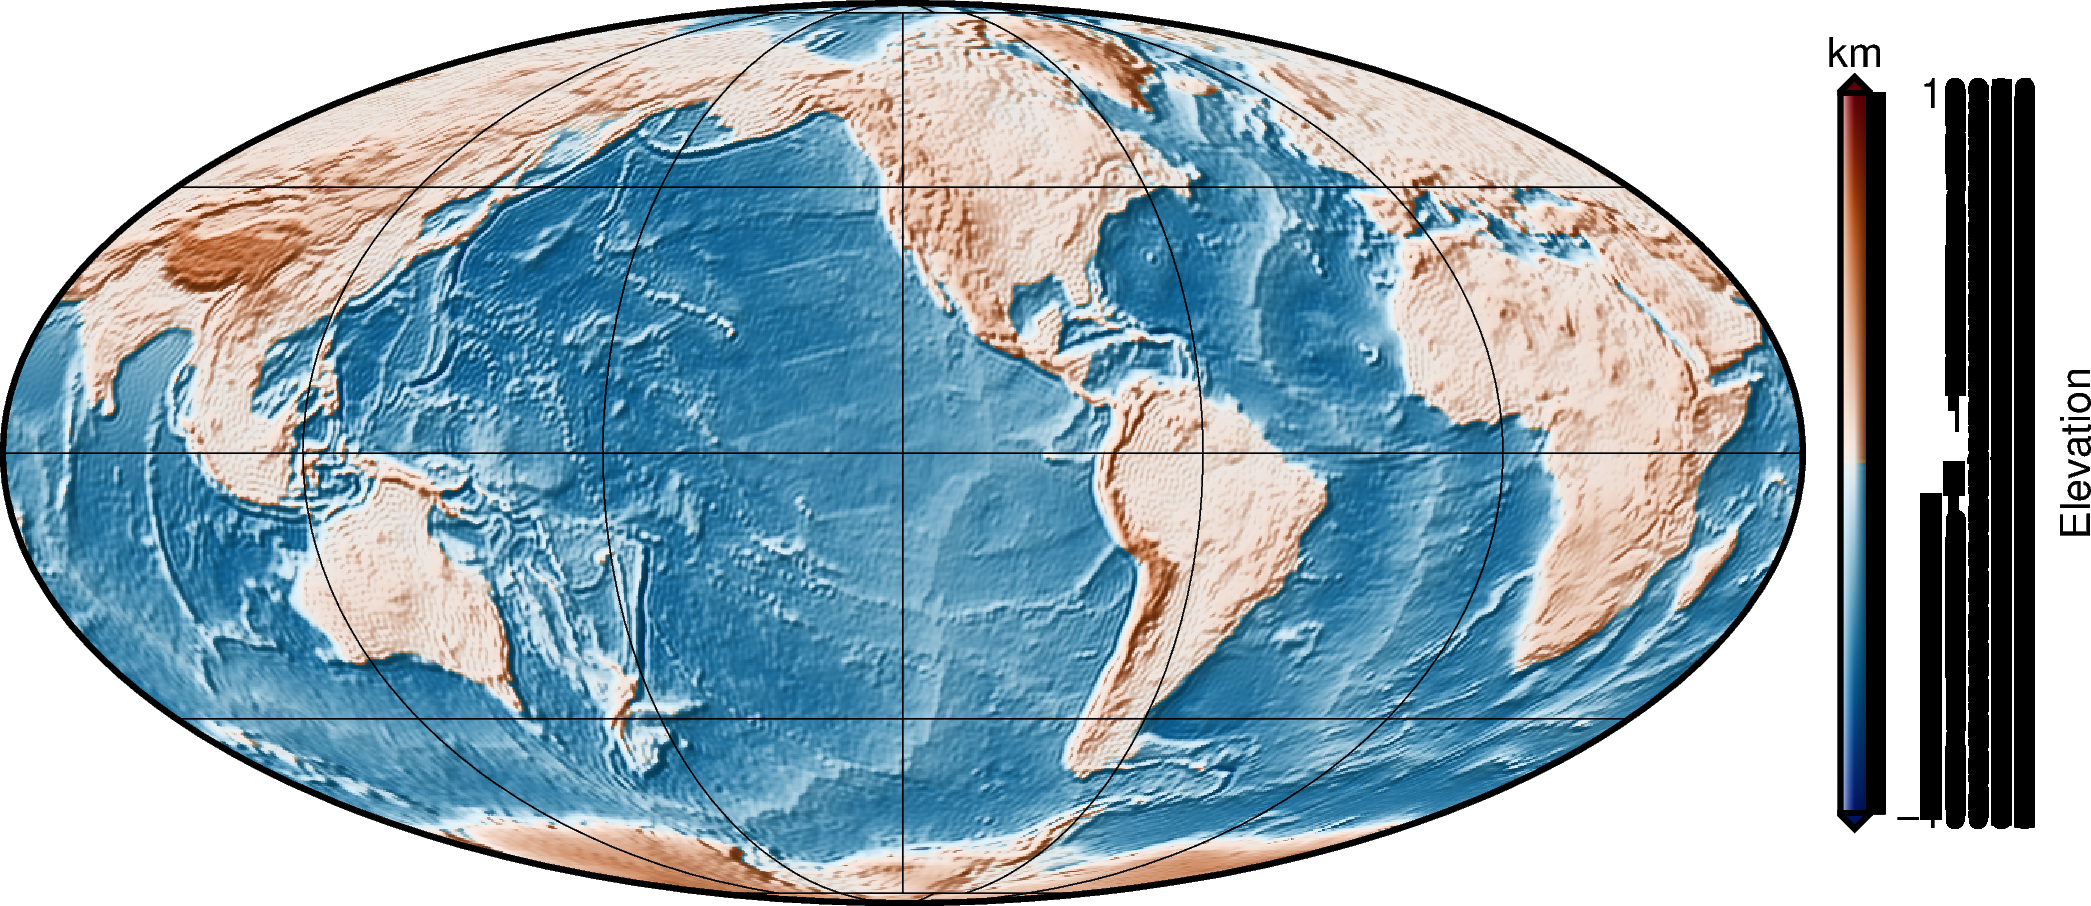

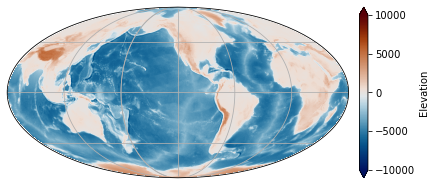

In [26]:
from cartopy import crs as ccrs
import pygmt
from palettable import scientific as scm

mycmap = scm.diverging.Vik_20.mpl_colormap

fig, ax = topo.plot(projection=ccrs.Mollweide(central_longitude=240.),
                    cmap=mycmap,
                    cmap_limits=[-10000, 10000],
                    tick_interval=[60, 45],
                    colorbar='right',
                    cb_label='Elevation',
                    cb_ylabel='m',
                    cb_triangles='both',
                    grid=True,
                    show=False)
fig.show()

fig2 = topo.plotgmt(projection='mollweide',
                   central_longitude=240.,
                   cmap='vik',
                   cmap_limits=[-10000, 10000],
                   tick_interval=None,
                   colorbar='right',
                   cb_label='Elevation',
                   cb_ylabel='km',
                   cb_triangles='both',
                   cb_tick_interval=2,
                   grid=[60, 45],
                   shading=True)

fig2.show()